In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,discriminant_analysis,cross_validation

In [4]:
# 加载数据方法，这里使用scikit-learn自带的糖尿病病人的数据集
def load_data():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data, diabetes.target,test_size=0.25,random_state=0)

In [5]:
# 岭回归模型
def test_Ridge(*data):
    train_x,test_x, train_y, test_y = data
    regr = linear_model.Ridge()
    regr.fit(train_x, train_y)
    
    # y=wx+b  分别显示权重及b值
    print('【权重】coefficient:{0}'.format(regr.coef_))
    print('【b值】intercept: {0}'.format(regr.intercept_))
    # 均方差
    print('【均方差】residual sum of squares:{0}'.format(np.mean((regr.predict(test_x) -test_y)**2)))
    # 成绩
    print('【成绩】Testing Score: {0}'.format(regr.score(test_x,test_y)))

In [6]:
# 用糖尿病数据进行测试
train_x,test_x, train_y, test_y = load_data()
test_Ridge(train_x, test_x, train_y, test_y)

【权重】coefficient:[  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017]
【b值】intercept: 152.4477761489962
【均方差】residual sum of squares:3192.3285539937624
【成绩】Testing Score: 0.35695757658096805


In [11]:
# 不同的α对结果的影响
def test_Ridge_alpha(*data):
    train_x,test_x, train_y, test_y = load_data()
    alphas = np.logspace(-2, 5 ,num=200)
    test_score = []
    for i,alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(train_x,train_y)
        test_score.append(regr.score(test_x,test_y))
        
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(alphas,test_score, label='Testing Score')
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'score')
    ax.set_ylim(0,0.4)
    ax.set_title('Ridge')
    ax.set_xscale('log')
    plt.show()

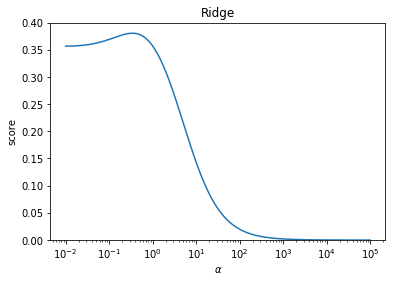

In [12]:
# 用糖尿病数据进行测试
train_x,test_x, train_y, test_y = load_data()
test_Ridge_alpha(train_x, test_x, train_y, test_y)